# Subset Sampling

The objective is to evaluate a probability from the Subset sampling technique.

We consider the function $g : \mathbb{R}^2 \rightarrow \mathbb{R}$ defined by:
\begin{align*}
g(X)= 20-(x_1-x_2)^2-8(x_1+x_2-4)^3
\end{align*}

and the input random vector $X = (X_1, X_2)$ which follows a Normal distribution with independent components, and identical marginals with 0.25 mean and unit variance: 
\begin{align*}
X \sim  \mathcal{N}(\mu = [0.25, 0.25], \sigma = [1,1], cov = I_2)
\end{align*}

We want to evaluate the probability:
\begin{align*}
p = \mathbb{P} \{ g(X) \leq 0 \}
\end{align*}

First, import the python modules: 

In [1]:
from  openturns import *

# Create the probabilistic model $Y = g(X)$

Create the input random vector $X$:

In [2]:
X = RandomVector(Normal([0.25]*2, [1]*2, IdentityMatrix(2)))

Create the function $g$:

In [3]:
g=SymbolicFunction(['x1', 'x2'], ['20-(x1-x2)^2-8*(x1+x2-4)^3'])
print('function g: ', g)

function g:  [x1,x2]->[20-(x1-x2)^2-8*(x1+x2-4)^3]


In order to be able to get the subset samples used in the algorithm, it is necessary to transform the *SymbolicFunction* into a *MemoizeFunction*:

In [4]:
g = MemoizeFunction(g)

Create the output random vector $Y = g(X)$:

In [5]:
Y = CompositeRandomVector(g,X)

# Create the event $\{ Y = g(X) \leq 0 \}$ 

In [6]:
myEvent = ThresholdEvent(Y, LessOrEqual(), 0.0) 

# Evaluate the probability with the subset sampling technique

In [7]:
algo = SubsetSampling(myEvent)

In order to get all the inputs and outputs that realize the event, you have to mention it now:

In [8]:
algo.setKeepEventSample(True)

Now you can run the algorithm!

In [9]:
algo.run()

In [10]:
result = algo.getResult()
proba = result.getProbabilityEstimate()
print('Proba Subset = ',  proba)
print('Current coefficient of variation = ', result.getCoefficientOfVariation())

Proba Subset =  0.00038430000000000067
Current coefficient of variation =  0.08714310124533411


The length of the confidence interval of level $95\%$ is:

In [11]:
length95 = result.getConfidenceLength()
print('Confidence length (0.95) = ', result.getConfidenceLength())

Confidence length (0.95) =  0.00013127483547940792


which enables to build the confidence interval: 

In [12]:
print('Confidence intervalle (0.95) = [', proba - length95/2, ', ', proba + length95/2, ']')

Confidence intervalle (0.95) = [ 0.0003186625822602967 ,  0.0004499374177397046 ]


You can also get the succesive thresholds used by the algorithm:

In [13]:
levels =  algo.getThresholdPerStep()
print('Levels of g = ', levels)

Levels of g =  [55.9036,18.4436,8.34832,0]


# Draw the subset samples used by the algorithm
The following manipulations are possible onfly if you have created a *MemoizeFunction* that enables to store all the inputs and output of the function $g$.

Get all the inputs where $g$ were evaluated: 

In [14]:
inputSampleSubset = g.getInputHistory()
nTotal = inputSampleSubset.getSize()
print('Number of evaluations of g = ', nTotal)

Number of evaluations of g =  40000


Within each step of the algorithm, a sample of size $N$ is created, where: 

In [15]:
N =  algo.getMaximumOuterSampling()*algo.getBlockSize()
print('Size of each subset = ', N)

Size of each subset =  10000


You can get the number $N_s$ of steps with: 

In [16]:
Ns = algo.getNumberOfSteps()
print('Number of steps= ', Ns)

Number of steps=  4


and you can verify that $N_s$ is equal to $\frac{nTotal}{N}$:

In [17]:
print('nTotal / N = ', int(nTotal / N))

nTotal / N =  4


Now, we can split the initial sample into subset samples of size $N_s$: 

In [18]:
list_subSamples = list()
for i in range(Ns):
    list_subSamples.append(inputSampleSubset[i*N:i*N +N])

The following graph draws each subset sample and the frontier $g(x_1, x_2) = l_i$ where $l_i$ is the threshold at the step $i$:

In [19]:
graph = Graph()
graph.setAxes(True)
graph.setGrid(True)
graph.setTitle('Subset sampling: samples')
graph.setXTitle(r'$x_1$')
graph.setYTitle(r'$x_2$')
graph.setLegendPosition('bottomleft')

Add all the subset samples:

In [20]:
for i in range(Ns):
    cloud = Cloud(list_subSamples[i])
    #cloud.setPointStyle("dot")
    graph.add(cloud)
col = Drawable().BuildDefaultPalette(Ns)
graph.setColors(col)

Add the frontiers $g(x_1, x_2) = l_i$ where $l_i$ is the threshold at the step $i$:

In [21]:
gIsoLines =  g.draw([-3]*2, [5]*2, [128]*2)
dr = gIsoLines.getDrawable(0)
for i in range(levels.getSize()):
    dr.setLevels([levels[i]])
    dr.setLineStyle('solid')
    dr.setLegend(r'$g(X) = $' + str(round(levels[i], 2)))
    dr.setLineWidth(3)
    dr.setColor(col[i])
    graph.add(dr)

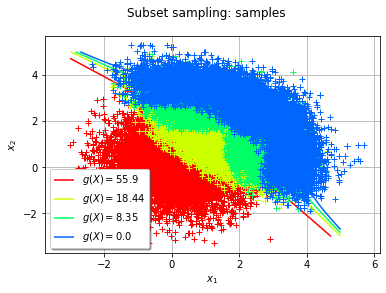

In [22]:
Show(graph)

# Draw the frontiers only
The following graph enables to understand the progresison of the algorithm:

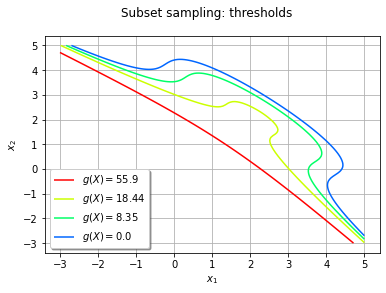

In [23]:
graph=Graph()
graph.setAxes(True)
graph.setGrid(True)
dr = gIsoLines.getDrawable(0)
for i in range(levels.getSize()):
    dr.setLevels([levels[i]])
    dr.setLineStyle('solid')
    dr.setLegend(r'$g(X) = $' + str(round(levels[i], 2)))
    dr.setLineWidth(3)
    graph.add(dr)

graph.setColors(col)
graph.setLegendPosition('bottomleft')
graph.setTitle('Subset sampling: thresholds')
graph.setXTitle(r'$x_1$')
graph.setYTitle(r'$x_2$')

Show(graph)

# Get all the input and output points that realized the event
The following lines are possible only if you have mentionned that you wanted to keep the points that realize the event with the method *algo.setKeepEventSample(True)*

In [24]:
inputEventSample = algo.getEventInputSample()
outputEventSample = algo.getEventOutputSample()
print('Number of event realizations = ', inputEventSample.getSize())

Number of event realizations =  3843


Here we have to avoid a bug of the version 1.15 because *getEventInputSample()* gives the sample in the stadrad space: we have to push it backward to the physical space.

In [25]:
dist = Normal([0.25]*2, [1]*2, IdentityMatrix(2))
transformFunc = dist.getInverseIsoProbabilisticTransformation()
inputEventSample = transformFunc(inputEventSample)

Draw them! They are all in the event space.

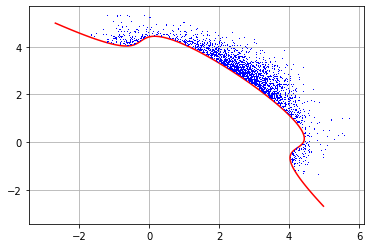

In [26]:
graph=Graph()
graph.setAxes(True)
graph.setGrid(True)
cloud = Cloud(inputEventSample)
cloud.setPointStyle('dot')
graph.add(cloud)
gIsoLines =  g.draw([-3]*2, [5]*2, [1000]*2)
dr = gIsoLines.getDrawable(0)
dr.setLevels([0.0])
dr.setColor('red')
graph.add(dr)
Show(graph)